In [46]:
import geopandas as gpd
import pandas as pd

In [47]:
gdf_dxf = gpd.read_file('GIS/bases-DXF/FERRAZOPOLIS-MONTANHAO - PROSABS.dxf', encoding='ANSI_1252')

In [48]:
bairro = 'FERRAZOPOLIS-MONTANHAO'

In [49]:
# gdf_dxf2 = gpd.read_file('GIS/bases-DXF/Bairro dos Casa.dxf', encoding='ANSI_1252')

In [50]:
# gdf_dxf2.loc[gdf_dxf2.Layer == 'MCT - PASSAGEM SANTOS DIAS DA SILVA', 'Layer'] = 'PASSAGEM SANTOS DIAS DA SILVA - DJI_0042'

In [51]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry
0,RUA VICENTE PASCHOALETTI - 07_01_2021 - FERMOM...,None,AcDbEntity:AcDb2dPolyline,ByBlock,993,None,"LINESTRING Z (343621.835 7374474.660 0.000, 34..."
1,RUA AFONÃO FURTADO DE MENDONÃA - 07_01_2021 ...,None,AcDbEntity:AcDb2dPolyline,ByBlock,A78,None,"LINESTRING Z (343623.782 7373977.092 0.000, 34..."
2,AVENIDA CONDÃ DE SÃO LOURENÃO - 07_01_2021 ...,None,AcDbEntity:AcDb2dPolyline,ByBlock,A93,None,"LINESTRING Z (343896.869 7373835.374 0.000, 34..."
3,RUA PEDRO ZOLCSAK - 07_01_2021 - FERMOM_124,None,AcDbEntity:AcDb2dPolyline,ByBlock,AC1,None,"LINESTRING Z (342795.669 7374356.102 0.000, 34..."
4,AVENIDA ALBERT SCHWEITZER - 07_01_2021 - FERMO...,None,AcDbEntity:AcDb2dPolyline,ByBlock,ACA,None,"LINESTRING Z (342797.267 7374994.640 0.000, 34..."
...,...,...,...,...,...,...,...
118,RUA ÃBRAMO LUCHESI - 07_01_2021- FERMOM_6,None,AcDbEntity:AcDb2dPolyline,ByBlock,480B,None,"LINESTRING Z (343198.075 7375636.546 0.000, 34..."
119,RUA MANOEL VITAL DO CARMO - 07_01_2021 - FERMO...,None,AcDbEntity:AcDb2dPolyline,ByBlock,4839,None,"LINESTRING Z (343386.875 7374941.074 0.000, 34..."
120,RUA YASMIN - 07_01_2021 - FERMOM_76 - FERMOM_80,None,AcDbEntity:AcDb2dPolyline,ByBlock,4842,None,"LINESTRING Z (343471.801 7374930.616 0.000, 34..."
121,RUA VENEZA - 07_01_2021 - FERMOM_72,None,AcDbEntity:AcDb2dPolyline,ByBlock,486A,None,"LINESTRING Z (343692.774 7374983.982 0.000, 34..."


In [52]:
# gdf_dxf = gpd.GeoDataFrame(pd.concat([gdf_dxf, gdf_dxf2]).reset_index().drop('index', axis=1))

In [53]:
# gdf_dxf.Layer.to_list()

<AxesSubplot:>

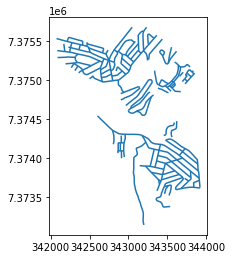

In [54]:
gdf_dxf.plot()

In [55]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.encode(encoding='raw_unicode_escape').str.decode(encoding='utf-8').str.replace('!', '1')

In [56]:
gdf_dxf['Layer'] = gdf_dxf.Layer.str.replace('MCT -', '')

In [57]:
gdf_dxf['lista'] = gdf_dxf.Layer.str.split(' - ')

In [85]:
gdf_dxf['DJI'] = gdf_dxf.Layer.str.findall('FERMOM_[0-9]{1,4}')

In [86]:
gdf_dxf.DJI

0                [FERMOM_132]
1                [FERMOM_108]
2                [FERMOM_136]
3                [FERMOM_124]
4      [FERMOM_16, FERMOM_79]
                ...          
118                [FERMOM_6]
119               [FERMOM_77]
120    [FERMOM_76, FERMOM_80]
121               [FERMOM_72]
122               [FERMOM_72]
Name: DJI, Length: 123, dtype: object

In [87]:
# gdf_dxf['etapa'] = gdf_dxf.Layer.str.extract('(ETAPA [0-9]{1,2})')

In [88]:
gdf_dxf['data_voo'] = gdf_dxf.Layer.str.extract('([0-9]{1,2}_[0-9]{2}_[0-9]{2})')

In [89]:
gdf_dxf['logradouro'] = gdf_dxf.lista.apply(lambda x: x[0])

In [90]:
gdf_dxf.loc[gdf_dxf['data_voo'].isna(), 'Layer'].to_list()

['  PRAÇA CONSELHEIRO SARAIVA',
 'RUA JESUS DE NAZARETH  - FERMOM_64',
 ' PASSAGEM JESUS DE NAZARÉ',
 '  RUA PADRE LÉO COMISSARI',
 ' RUA COMANDANTE ELIAS JAFETE',
 ' RUA JERONIMO DE ATAÍDE',
 'RUA MIN. BARROS MONTEIRO - FERMOM_8',
 ' JOSÉ ARTHUR DA FROTA MOREIRA',
 ' RUA PETROLINA',
 ' RUA MARIA JOSÉ DA SILVA',
 ' RUA DÁCIO ÁGUIAR DE MORÃES',
 ' RUA DAS ZÍNIAS FILHO',
 ' RUA MARIA JOSÉ DA SILVA',
 ' RUA PRIMAVERIL',
 ' RUA PIRATININGA',
 ' RUA GREGÓRIO VITÓRIO MORASSI']

In [91]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(FERMOM_[0-9]{1,4})', expand=True)

,0,1,2,3,4,5,6,7,8,9
0,RUA VICENTE PASCHOALETTI -,07_01_20,None,21 -,None,FERMOM_132,,None,None,None
1,RUA AFONÇO FURTADO DE MENDONÇA -,07_01_20,None,21 -,None,FERMOM_108,,None,None,None
2,AVENIDA CONDÉ DE SÃO LOURENÇO -,07_01_20,None,21 -,None,FERMOM_136,,None,None,None
3,RUA PEDRO ZOLCSAK -,07_01_20,None,21 -,None,FERMOM_124,,None,None,None
4,AVENIDA ALBERT SCHWEITZER -,07_01_20,None,21 -,None,FERMOM_16,-,None,FERMOM_79,
...,...,...,...,...,...,...,...,...,...,...
118,RUA ÁBRAMO LUCHESI -,07_01_20,None,21-,None,FERMOM_6,,None,None,None
119,RUA MANOEL VITAL DO CARMO -,07_01_20,None,21 -,None,FERMOM_77,,None,None,None
120,RUA YASMIN -,07_01_20,None,21 -,None,FERMOM_76,-,None,FERMOM_80,
121,RUA VENEZA -,07_01_20,None,21 -,None,FERMOM_72,,None,None,None


In [92]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(FERMOM_[0-9]{1,4})', expand=True)[3].unique().tolist()

['21 - ', None, '21 -', '', '21- ']

In [94]:
etapas = {
     '21 - ':'etapa_00', 
    '21 -':'etapa_00',
    '':'etapa_00',
    '21- ':'etapa_00'
}

In [95]:
len(etapas)

4

In [96]:
gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(FERMOM_[0-9]{1,4})', expand=True)[3].map(etapas)

0      etapa_00
1      etapa_00
2      etapa_00
3      etapa_00
4      etapa_00
         ...   
118    etapa_00
119    etapa_00
120    etapa_00
121    etapa_00
122    etapa_00
Name: 3, Length: 123, dtype: object

In [97]:
gdf_dxf.loc[:, 'etapa'] = gdf_dxf.Layer.str.split('([0-9]{1,2}_[0-9]{2}_[0-9]{2})|(FERMOM_[0-9]{1,4})', expand=True)[3].map(etapas)

In [98]:
gdf_dxf.loc[:, 'etapa']

0      etapa_00
1      etapa_00
2      etapa_00
3      etapa_00
4      etapa_00
         ...   
118    etapa_00
119    etapa_00
120    etapa_00
121    etapa_00
122    etapa_00
Name: etapa, Length: 123, dtype: object

In [99]:
gdf_dxf

,Layer,PaperSpace,SubClasses,Linetype,EntityHandle,Text,geometry,lista,DJI,data_voo,logradouro,etapa
0,RUA VICENTE PASCHOALETTI - 07_01_2021 - FERMOM...,None,AcDbEntity:AcDb2dPolyline,ByBlock,993,None,"LINESTRING Z (343621.835 7374474.660 0.000, 34...","[RUA VICENTE PASCHOALETTI, 07_01_2021, FERMOM_...",[FERMOM_132],07_01_20,RUA VICENTE PASCHOALETTI,etapa_00
1,RUA AFONÇO FURTADO DE MENDONÇA - 07_01_2021 - ...,None,AcDbEntity:AcDb2dPolyline,ByBlock,A78,None,"LINESTRING Z (343623.782 7373977.092 0.000, 34...","[RUA AFONÇO FURTADO DE MENDONÇA, 07_01_2021, F...",[FERMOM_108],07_01_20,RUA AFONÇO FURTADO DE MENDONÇA,etapa_00
2,AVENIDA CONDÉ DE SÃO LOURENÇO - 07_01_2021 - F...,None,AcDbEntity:AcDb2dPolyline,ByBlock,A93,None,"LINESTRING Z (343896.869 7373835.374 0.000, 34...","[AVENIDA CONDÉ DE SÃO LOURENÇO, 07_01_2021, FE...",[FERMOM_136],07_01_20,AVENIDA CONDÉ DE SÃO LOURENÇO,etapa_00
3,RUA PEDRO ZOLCSAK - 07_01_2021 - FERMOM_124,None,AcDbEntity:AcDb2dPolyline,ByBlock,AC1,None,"LINESTRING Z (342795.669 7374356.102 0.000, 34...","[RUA PEDRO ZOLCSAK, 07_01_2021, FERMOM_124]",[FERMOM_124],07_01_20,RUA PEDRO ZOLCSAK,etapa_00
4,AVENIDA ALBERT SCHWEITZER - 07_01_2021 - FERMO...,None,AcDbEntity:AcDb2dPolyline,ByBlock,ACA,None,"LINESTRING Z (342797.267 7374994.640 0.000, 34...","[AVENIDA ALBERT SCHWEITZER, 07_01_2021, FERMOM...","[FERMOM_16, FERMOM_79]",07_01_20,AVENIDA ALBERT SCHWEITZER,etapa_00
...,...,...,...,...,...,...,...,...,...,...,...,...
118,RUA ÁBRAMO LUCHESI - 07_01_2021- FERMOM_6,None,AcDbEntity:AcDb2dPolyline,ByBlock,480B,None,"LINESTRING Z (343198.075 7375636.546 0.000, 34...","[RUA ÁBRAMO LUCHESI, 07_01_2021- FERMOM_6]",[FERMOM_6],07_01_20,RUA ÁBRAMO LUCHESI,etapa_00
119,RUA MANOEL VITAL DO CARMO - 07_01_2021 - FERMO...,None,AcDbEntity:AcDb2dPolyline,ByBlock,4839,None,"LINESTRING Z (343386.875 7374941.074 0.000, 34...","[RUA MANOEL VITAL DO CARMO, 07_01_2021, FERMOM...",[FERMOM_77],07_01_20,RUA MANOEL VITAL DO CARMO,etapa_00
120,RUA YASMIN - 07_01_2021 - FERMOM_76 - FERMOM_80,None,AcDbEntity:AcDb2dPolyline,ByBlock,4842,None,"LINESTRING Z (343471.801 7374930.616 0.000, 34...","[RUA YASMIN, 07_01_2021, FERMOM_76, FERMOM_80]","[FERMOM_76, FERMOM_80]",07_01_20,RUA YASMIN,etapa_00
121,RUA VENEZA - 07_01_2021 - FERMOM_72,None,AcDbEntity:AcDb2dPolyline,ByBlock,486A,None,"LINESTRING Z (343692.774 7374983.982 0.000, 34...","[RUA VENEZA, 07_01_2021, FERMOM_72]",[FERMOM_72],07_01_20,RUA VENEZA,etapa_00


In [100]:
pd_videos = pd.DataFrame(list(map(lambda x: 
         list(map(lambda y: y + '.MOV', x))
         , gdf_dxf.DJI))).add_prefix('Video_')

In [101]:
pd_videos

,Video_0,Video_1
0,FERMOM_132.MOV,None
1,FERMOM_108.MOV,None
2,FERMOM_136.MOV,None
3,FERMOM_124.MOV,None
4,FERMOM_16.MOV,FERMOM_79.MOV
...,...,...
118,FERMOM_6.MOV,None
119,FERMOM_77.MOV,None
120,FERMOM_76.MOV,FERMOM_80.MOV
121,FERMOM_72.MOV,None


In [102]:
gdf_dxf = gdf_dxf.merge(pd_videos, left_index=True, right_index=True)

In [103]:
gdf_dxf.columns

Index(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text',
       'geometry', 'lista', 'DJI', 'data_voo', 'logradouro', 'etapa',
       'Video_0', 'Video_1'],
      dtype='object')

In [104]:
gdf_dxf.loc[gdf_dxf.etapa.isna(), 'etapa'] = ''

In [105]:
gdf_dxf.etapa = gdf_dxf.etapa.str.replace(' ', '_')

In [106]:
gdf_dxf.loc[gdf_dxf.etapa != '', 'etapa'] += '/'

In [107]:
gdf_dxf.loc[~gdf_dxf.data_voo.isna(), 'data_voo'] += '/'

In [112]:
for c in gdf_dxf.loc[:, gdf_dxf.columns.str.startswith('Video')].columns:
    gdf_dxf[c + '_path'] = 'videos/' + bairro.lower().replace('-', '_') + '/' + gdf_dxf.etapa + gdf_dxf[c]

In [113]:
gdf_dxf = gdf_dxf.dissolve(by=['Layer'], aggfunc='first').reset_index()

In [114]:
gdf_dxf.crs = 'epsg:31983'

In [115]:
gdf_dxf

,Layer,geometry,PaperSpace,SubClasses,Linetype,EntityHandle,Text,lista,DJI,data_voo,logradouro,etapa,Video_0,Video_1,Video_0_path,Video_1_path,Video_0_path_path,Video_1_path_path
0,PRAÇA CONSELHEIRO SARAIVA,"LINESTRING Z (343399.537 7373661.141 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,AFB,None,[ PRAÇA CONSELHEIRO SARAIVA],[],None,PRAÇA CONSELHEIRO SARAIVA,,None,None,None,None,None,None
1,RUA PADRE LÉO COMISSARI,"LINESTRING Z (343223.842 7374203.995 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,D00,None,[ RUA PADRE LÉO COMISSARI],[],None,RUA PADRE LÉO COMISSARI,,None,None,None,None,None,None
2,JOSÉ ARTHUR DA FROTA MOREIRA,"LINESTRING Z (342344.808 7375229.735 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,E48,None,[ JOSÉ ARTHUR DA FROTA MOREIRA],[],None,JOSÉ ARTHUR DA FROTA MOREIRA,,None,None,None,None,None,None
3,PASSAGEM JESUS DE NAZARÉ,"LINESTRING Z (343278.244 7374848.294 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,C4A,None,[ PASSAGEM JESUS DE NAZARÉ],[],None,PASSAGEM JESUS DE NAZARÉ,,None,None,None,None,None,None
4,RUA COMANDANTE ELIAS JAFETE,"LINESTRING Z (343514.969 7374956.034 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,D44,None,[ RUA COMANDANTE ELIAS JAFETE],[],None,RUA COMANDANTE ELIAS JAFETE,,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,TV. GASPAR DE SOUZA - 08_01_2021 - FERMOM_218,"LINESTRING Z (343511.450 7373644.522 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,C7E,None,"[TV. GASPAR DE SOUZA, 08_01_2021, FERMOM_218]",[FERMOM_218],08_01_20/,TV. GASPAR DE SOUZA,etapa_00/,FERMOM_218.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None,videos/ferrazopolis_montanhao/etapa_00/videos/...,None
102,TV. LOURENÇO DE ALMADA - 07_01_2021 - FERMOM_113,"LINESTRING Z (343722.641 7373738.835 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,EE8,None,"[TV. LOURENÇO DE ALMADA, 07_01_2021, FERMOM_113]",[FERMOM_113],07_01_20/,TV. LOURENÇO DE ALMADA,etapa_00/,FERMOM_113.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None,videos/ferrazopolis_montanhao/etapa_00/videos/...,None
103,TV. VIODA NOVA - 07_01_2021 - FERMOM_123,"LINESTRING Z (342865.831 7374092.746 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,46F7,None,"[TV. VIODA NOVA, 07_01_2021, FERMOM_123]",[FERMOM_123],07_01_20/,TV. VIODA NOVA,etapa_00/,FERMOM_123.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None,videos/ferrazopolis_montanhao/etapa_00/videos/...,None
104,VIELA 2A - 07_01_2021 - FERMOM_122,"LINESTRING Z (342895.366 7374195.576 0.000, 34...",None,AcDbEntity:AcDb2dPolyline,ByBlock,C75,None,"[VIELA 2A, 07_01_2021, FERMOM_122]",[FERMOM_122],07_01_20/,VIELA 2A,etapa_00/,FERMOM_122.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None,videos/ferrazopolis_montanhao/etapa_00/videos/...,None


In [116]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista'], axis=1)

,geometry,data_voo,logradouro,etapa,Video_0,Video_1,Video_0_path,Video_1_path,Video_0_path_path,Video_1_path_path
0,"LINESTRING Z (343399.537 7373661.141 0.000, 34...",None,PRAÇA CONSELHEIRO SARAIVA,,None,None,None,None,None,None
1,"LINESTRING Z (343223.842 7374203.995 0.000, 34...",None,RUA PADRE LÉO COMISSARI,,None,None,None,None,None,None
2,"LINESTRING Z (342344.808 7375229.735 0.000, 34...",None,JOSÉ ARTHUR DA FROTA MOREIRA,,None,None,None,None,None,None
3,"LINESTRING Z (343278.244 7374848.294 0.000, 34...",None,PASSAGEM JESUS DE NAZARÉ,,None,None,None,None,None,None
4,"LINESTRING Z (343514.969 7374956.034 0.000, 34...",None,RUA COMANDANTE ELIAS JAFETE,,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
101,"LINESTRING Z (343511.450 7373644.522 0.000, 34...",08_01_20/,TV. GASPAR DE SOUZA,etapa_00/,FERMOM_218.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None,videos/ferrazopolis_montanhao/etapa_00/videos/...,None
102,"LINESTRING Z (343722.641 7373738.835 0.000, 34...",07_01_20/,TV. LOURENÇO DE ALMADA,etapa_00/,FERMOM_113.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None,videos/ferrazopolis_montanhao/etapa_00/videos/...,None
103,"LINESTRING Z (342865.831 7374092.746 0.000, 34...",07_01_20/,TV. VIODA NOVA,etapa_00/,FERMOM_123.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None,videos/ferrazopolis_montanhao/etapa_00/videos/...,None
104,"LINESTRING Z (342895.366 7374195.576 0.000, 34...",07_01_20/,VIELA 2A,etapa_00/,FERMOM_122.MOV,None,videos/ferrazopolis_montanhao/etapa_00/FERMOM_...,None,videos/ferrazopolis_montanhao/etapa_00/videos/...,None


In [118]:
gdf_dxf.drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0', 'Video_1'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.gpkg', driver='GPKG')

In [119]:
gdf_dxf.to_crs('EPSG:4326').drop(['Layer', 'PaperSpace', 'SubClasses', 'Linetype', 'EntityHandle', 'Text', 'DJI', 'lista', 'etapa', 'data_voo', 'Video_0', 'Video_1'], axis=1).to_file(f'./videos/ruas-videos-{bairro}-PROSAB.geojson', driver='GeoJSON')

In [120]:
gdf_dxf.dtypes

Layer                  object
geometry             geometry
PaperSpace             object
SubClasses             object
Linetype               object
EntityHandle           object
Text                   object
lista                  object
DJI                    object
data_voo               object
logradouro             object
etapa                  object
Video_0                object
Video_1                object
Video_0_path           object
Video_1_path           object
Video_0_path_path      object
Video_1_path_path      object
dtype: object

In [121]:
gdf_dxf.Video_0.isna().value_counts()

False    93
True     13
Name: Video_0, dtype: int64